In [1]:
from settings import *

random_rho0s: setting seed=30554


In [2]:
qubits = TriangularLayoutA(m=1, cutoff=1, distance=0.9)
operations = [("rz", "A"), ("rx", "A"), ("rz", "A"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

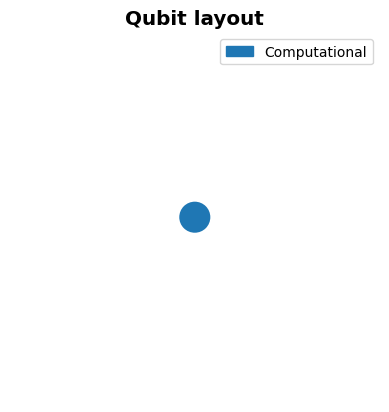

In [3]:
qubits.show_layout()

In [4]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, n_grad=10, max_count=100)

theta_opt = np.save("ham_theta_opt.npy", theta_opt)
thetas = np.save("ham_thetas.npy", thetas)
errors = np.save("ham_errors.npy", errors)

optimizer (optimization indices): setting seed=91538
Iteration: 0 
            Max gradient term: 0.09457295714554448 
            Current gradient: [ 0.          0.          0.038951    0.          0.          0.
  0.          0.          0.09457296  0.          0.          0.
  0.          0.          0.03811032  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.07133682  0.          0.          0.          0.
  0.          0.          0.         -0.04247041  0.          0.
  0.          0.          0.04030174  0.        ] 
            Current error: 0.3967495972144174 
            Current sigma values: (0, 1, 10)


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 10 
            Max gradient term: 0.00031712323975980814 
            Current gradient: [0.00000000e+00 0.00000000e+00 3.17123240e-04 0.00000000e+00
 0.00000000e+00 1.84525805e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.36685785e-05 0.00000000e+00 0.00000000e+00
 2.98962878e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.20344030e-04 4.24087436e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.67382270e-04 0.00000000e+00 0.00000000e+00
 5.80326398e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00] 
            Current error: 2.7645162955040333e-07 
            Current sigma values: (2, 3, 2.5)
Error reduced below threshold of 1e-10 after 18 iterations


In [5]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [6]:
theta_opt

array([1.15508709, 1.00076824, 0.60969722, 1.        , 0.99987944,
       1.05414602, 1.02391356, 1.        , 0.07975235, 0.96861672,
       1.16913733, 1.        , 1.00137854, 1.22735641, 0.04346905,
       1.        , 0.78148334, 0.9397214 , 0.87576535, 1.        ,
       0.99068791, 1.01170302, 0.87928615, 1.        , 1.34715006,
       0.26607254, 0.98748115, 1.        , 0.31273567, 1.20628845,
       1.35270783, 1.        , 1.33956966, 1.39099423, 0.23784547,
       1.        , 1.00034514, 1.46822112, 0.59738186, 1.        ])

In [7]:
from q_channel_approx.unitary_circuits import unitary_circuit_fac

In [8]:
ham = unitary_circuit_fac(qubits, operations, repeats=1, depth=1)(theta_opt)
import qutip as qt
qt.Qobj(ham)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.55741608-0.67758038j -0.46203469-0.12921339j]
 [ 0.46203469-0.12921339j  0.55741608+0.67758038j]]

In [9]:
ham

array([[ 0.55741608-0.67758038j, -0.46203469-0.12921339j],
       [ 0.46203469-0.12921339j,  0.55741608+0.67758038j]])

In [16]:
from q_channel_approx.physics_defns import create_hamiltonian
h = create_hamiltonian(system).full()
import scipy as sc
sc.linalg.expm((-1j) * 0.1 * h)

array([[0.99920011+0.j        , 0.        -0.03998933j],
       [0.        -0.03998933j, 0.99920011+0.j        ]])

rho_rand_haar: seed=70347


c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

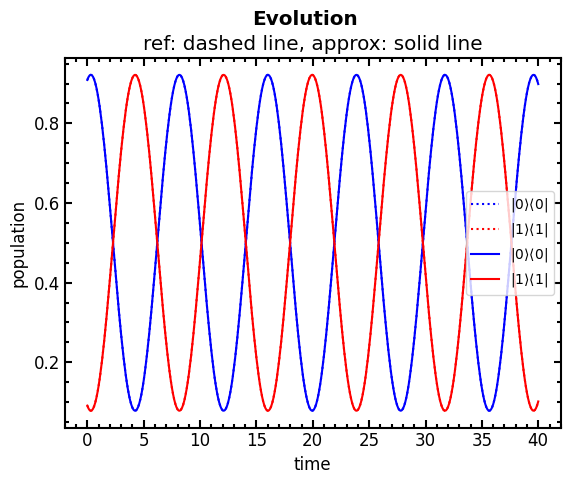

In [17]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(400, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.1, N=400, s=system, jump_opers=[])
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

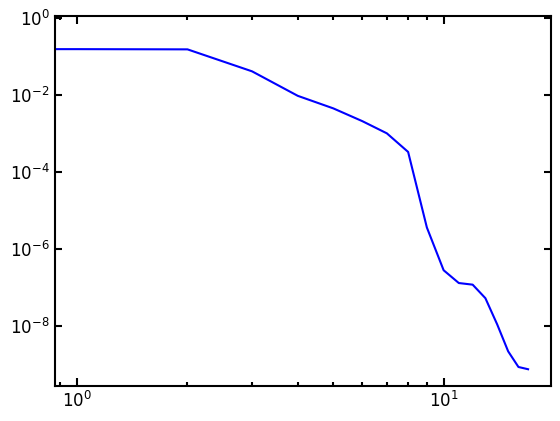

In [12]:
plt.loglog(errors)